In [224]:
!pip install streamlit

# Data Understanding

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [226]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [227]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [228]:
df.shape

(5110, 12)

In [229]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [231]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [232]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [233]:
df.describe(include=['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [234]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1419,24674,Male,43.0,0,0,Yes,Private,Urban,81.94,27.7,smokes,0
4765,42626,Female,76.0,1,0,Yes,Govt_job,Rural,63.28,28.2,never smoked,0
127,70943,Female,80.0,0,0,Yes,Private,Urban,73.54,24.0,Unknown,1
4544,54869,Female,30.0,0,0,Yes,Private,Urban,116.98,26.0,never smoked,0
523,9729,Male,70.0,0,0,Yes,Private,Urban,102.64,28.3,never smoked,0


In [235]:
[df['gender'].value_counts(), df['ever_married'].value_counts(), df['work_type'].value_counts(), df['Residence_type'].value_counts(), df['smoking_status'].value_counts()]

[gender
 Female    2994
 Male      2115
 Other        1
 Name: count, dtype: int64,
 ever_married
 Yes    3353
 No     1757
 Name: count, dtype: int64,
 work_type
 Private          2925
 Self-employed     819
 children          687
 Govt_job          657
 Never_worked       22
 Name: count, dtype: int64,
 Residence_type
 Urban    2596
 Rural    2514
 Name: count, dtype: int64,
 smoking_status
 never smoked       1892
 Unknown            1544
 formerly smoked     885
 smokes              789
 Name: count, dtype: int64]

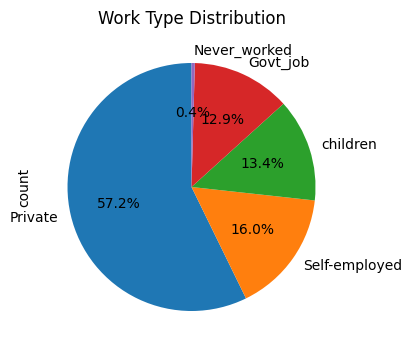

In [236]:
df['work_type'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 figsize=(4,5))
plt.title("Work Type Distribution")
plt.show()

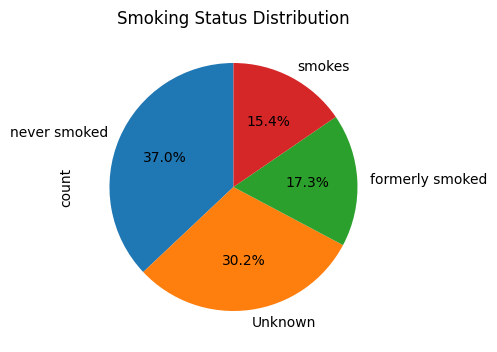

In [237]:
df['smoking_status'].value_counts().plot(kind='pie',
                                 autopct='%1.1f%%',
                                 startangle=90,
                                 figsize=(4,5))
plt.title("Smoking Status Distribution")
plt.show()

In [238]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

id: 5110 unique values
gender: 3 unique values
age: 104 unique values
hypertension: 2 unique values
heart_disease: 2 unique values
ever_married: 2 unique values
work_type: 5 unique values
Residence_type: 2 unique values
avg_glucose_level: 3979 unique values
bmi: 418 unique values
smoking_status: 4 unique values
stroke: 2 unique values


In [239]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


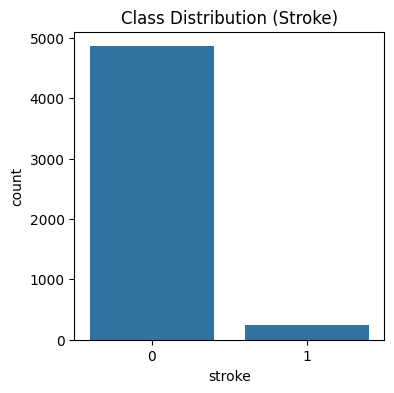

In [240]:
df['stroke'].value_counts(normalize=True) * 100
plt.figure(figsize=(4,4))
sns.countplot(x='stroke', data=df)
plt.title("Class Distribution (Stroke)")
plt.show()

In [241]:
df.nunique()

,0
id,5110
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418


In [242]:
df.ndim

2

In [243]:
df.duplicated().sum()

np.int64(0)

<Axes: >

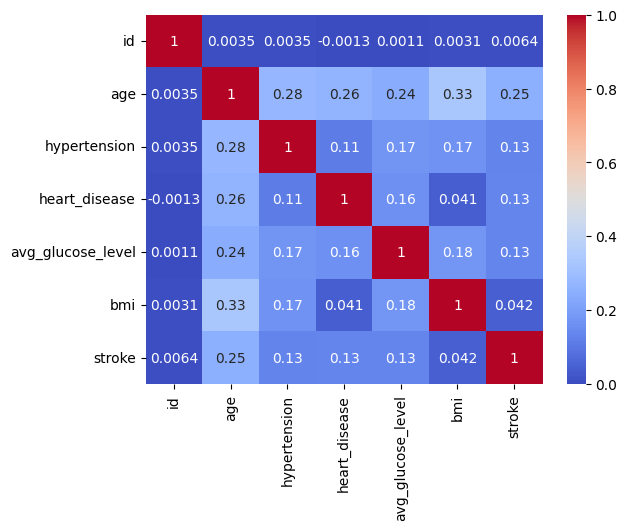

In [244]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

# Data Preprocessing

In [245]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


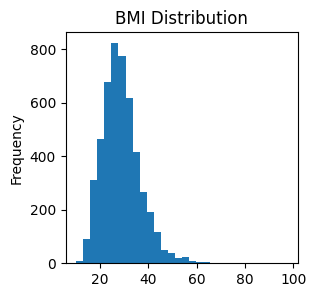

In [246]:
df['bmi'].plot(kind='hist', bins=30, figsize=(3,3))
plt.title("BMI Distribution")
plt.show()

In [247]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [248]:
df.duplicated().sum()

np.int64(0)

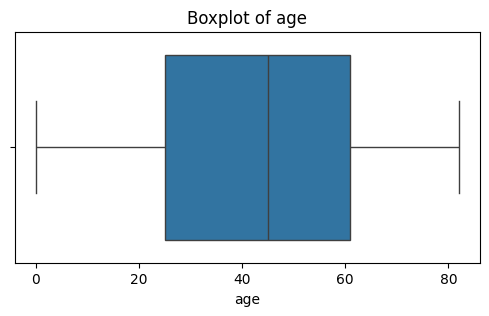

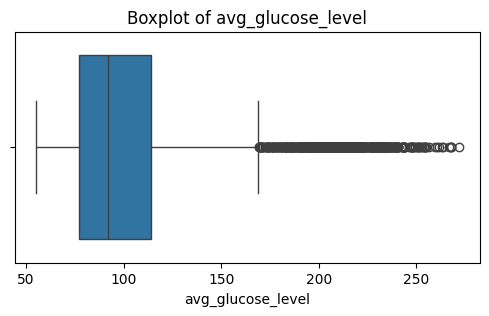

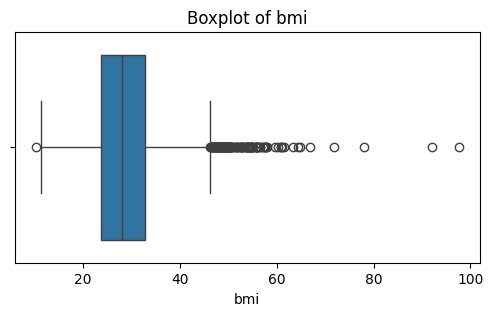

In [249]:
num_cols = ['age', 'avg_glucose_level', 'bmi']

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [250]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))
    return df

for col in num_cols:
    df = cap_outliers(df, col)

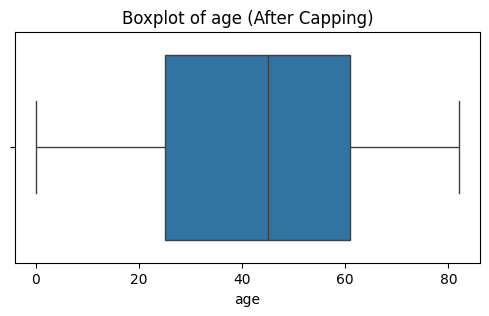

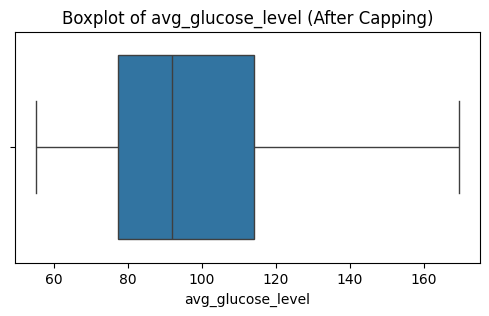

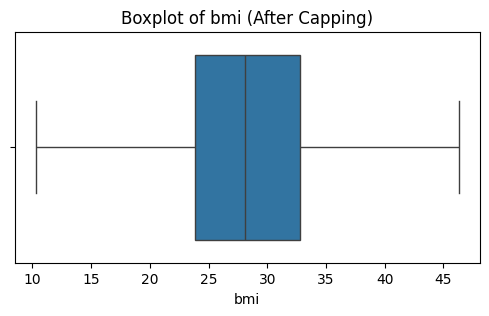

In [251]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Capping)')
    plt.show()

In [252]:
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

gender
Female    2994
Male      2115
Name: count, dtype: int64


In [253]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])

print("\nAfter Label Encoding:")
print(df['gender'].value_counts())

print(dict(zip(le.classes_, le.transform(le.classes_))))


After Label Encoding:
gender
0    2994
1    2115
Name: count, dtype: int64
{'Female': np.int64(0), 'Male': np.int64(1)}


In [254]:
df.drop('id',axis=1,inplace=True)

In [255]:
df = pd.get_dummies(df, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=False)

In [256]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4551,1,51.0,0,0,Yes,78.0500,31.4,0,False,False,True,False,False,True,False,False,False,True,False
3498,0,43.0,0,0,Yes,81.7700,25.4,0,True,False,False,False,False,True,False,False,False,True,False
1011,1,71.0,0,0,Yes,169.3575,31.6,0,False,False,True,False,False,True,False,False,True,False,False
556,1,36.0,0,0,No,61.2900,26.7,0,False,False,True,False,False,False,True,False,False,True,False
4689,0,32.0,0,0,Yes,102.8700,26.6,0,False,False,True,False,False,True,False,False,False,False,True


In [257]:
df.shape

(5109, 19)

In [258]:
df['age'] = df['age'].astype(int)
print(df['age'].dtype)

int64


In [259]:
X = df.drop("stroke", axis=1)   # drop target column
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution in Train:\n", y_train.value_counts(normalize=True))
print("Target distribution in Test:\n", y_test.value_counts(normalize=True))

Train shape: (4087, 18)
Test shape: (1022, 18)
Target distribution in Train:
 stroke
0    0.951309
1    0.048691
Name: proportion, dtype: float64
Target distribution in Test:
 stroke
0    0.951076
1    0.048924
Name: proportion, dtype: float64


# EDA & Visualization

In [260]:
print("Descriptive Stats:\n")
print(df[['age', 'bmi', 'avg_glucose_level']].describe())

for col in ['age', 'bmi', 'avg_glucose_level']:
    print(f"\nMode of {col}: {df[col].mode()[0]}")

Descriptive Stats:

               age          bmi  avg_glucose_level
count  5109.000000  5109.000000        5109.000000
mean     43.218634    28.691642         100.987918
std      22.634799     7.121011          33.212706
min       0.000000    10.300000          55.120000
25%      25.000000    23.800000          77.240000
50%      45.000000    28.100000          91.880000
75%      61.000000    32.800000         114.090000
max      82.000000    46.300000         169.357500

Mode of age: 78

Mode of bmi: 28.1

Mode of avg_glucose_level: 169.35750000000002


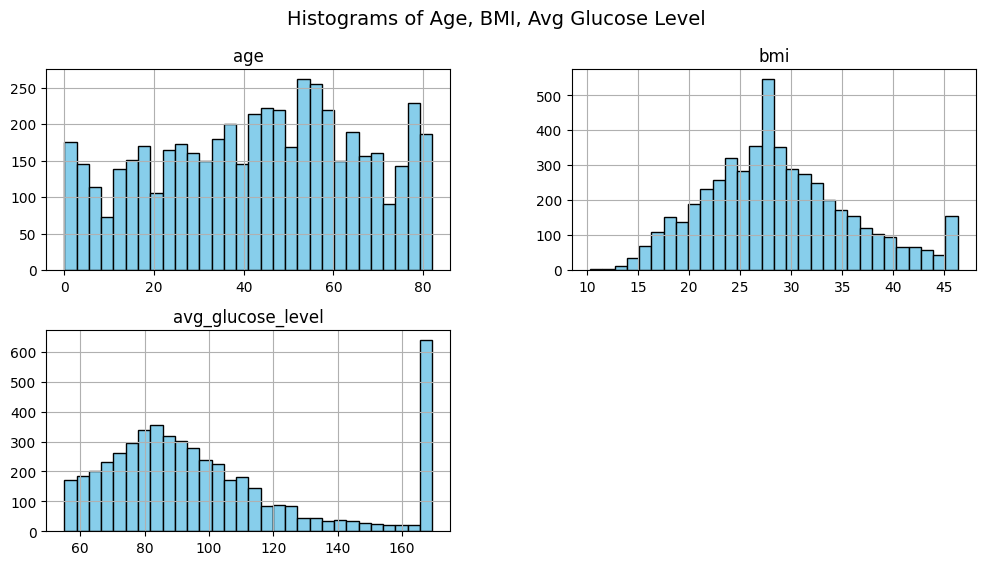

In [261]:
num_cols = ['age', 'bmi', 'avg_glucose_level']
df[num_cols].hist(bins=30, figsize=(12,6), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Age, BMI, Avg Glucose Level", fontsize=14)
plt.show()

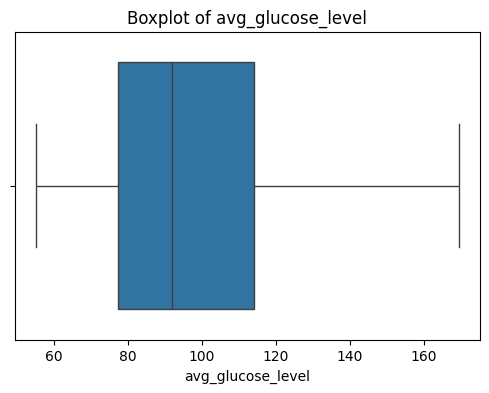

In [262]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['avg_glucose_level'])
plt.title("Boxplot of avg_glucose_level")
plt.show()

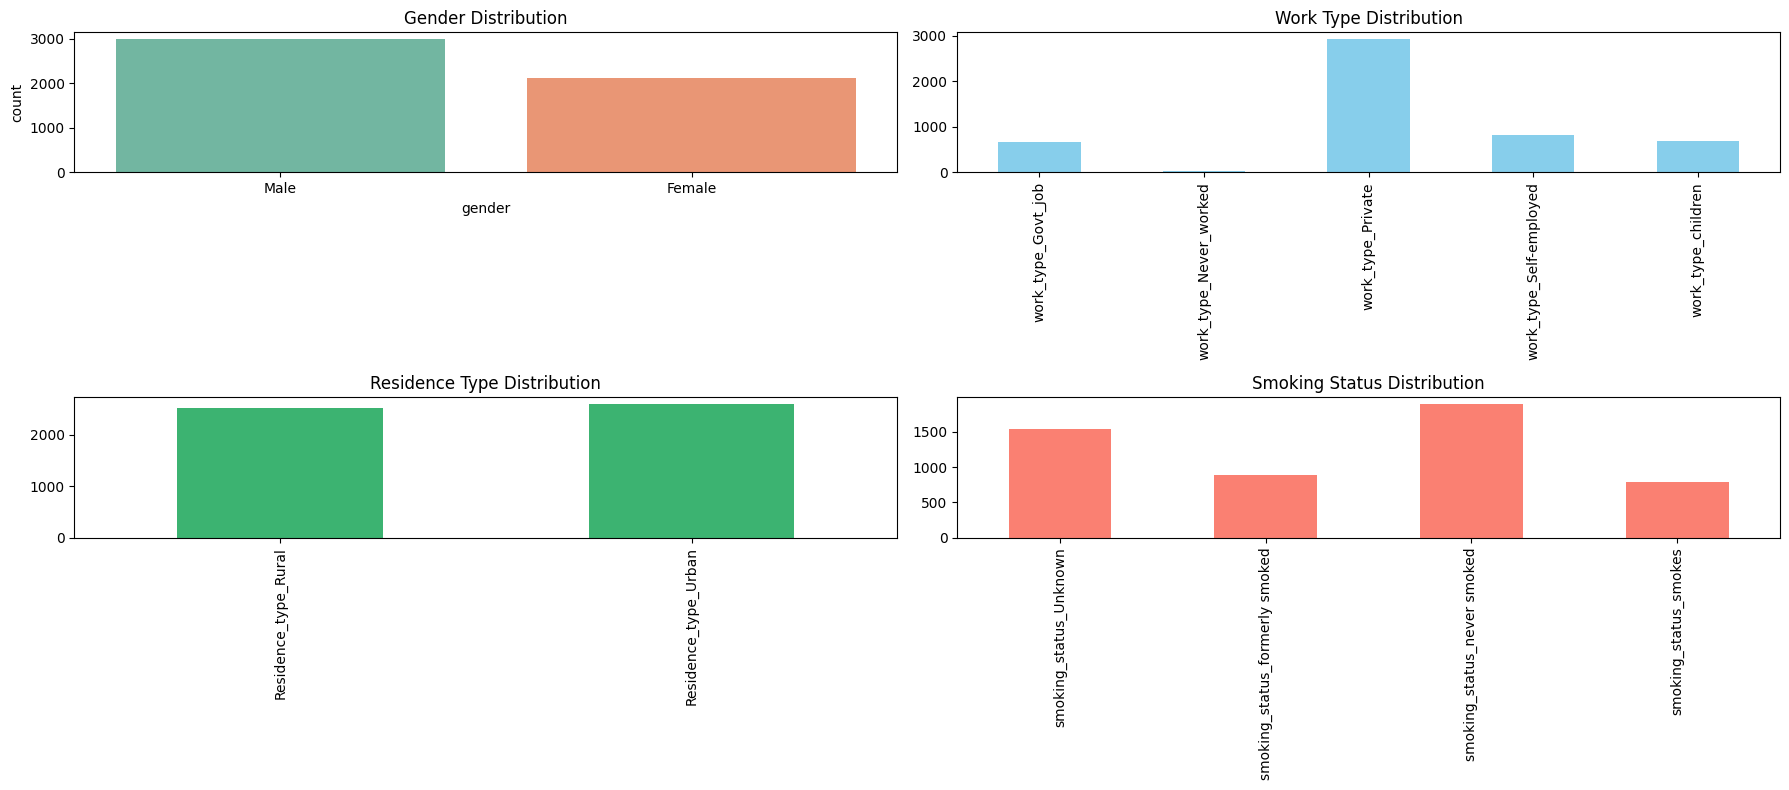

In [263]:
cat_cols = ['gender', 'work_type', 'Residence_type', 'smoking_status']

plt.figure(figsize=(18,8))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)

    if col == 'gender':
        sns.countplot(x='gender', hue='gender', data=df, palette="Set2", legend=False)
        plt.title("Gender Distribution")
        plt.xticks([0,1], ['Male','Female'])

    elif col == 'work_type':
        work_cols = [c for c in df.columns if c.startswith("work_type_")]
        df[work_cols].sum().plot(kind='bar', color='skyblue')
        plt.title("Work Type Distribution")

    elif col == 'Residence_type':
        res_cols = [c for c in df.columns if c.startswith("Residence_type_")]
        df[res_cols].sum().plot(kind='bar', color='mediumseagreen')
        plt.title("Residence Type Distribution")

    elif col == 'smoking_status':
        smoke_cols = [c for c in df.columns if c.startswith("smoking_status_")]
        df[smoke_cols].sum().plot(kind='bar', color='salmon')
        plt.title("Smoking Status Distribution")

plt.tight_layout()
plt.show()

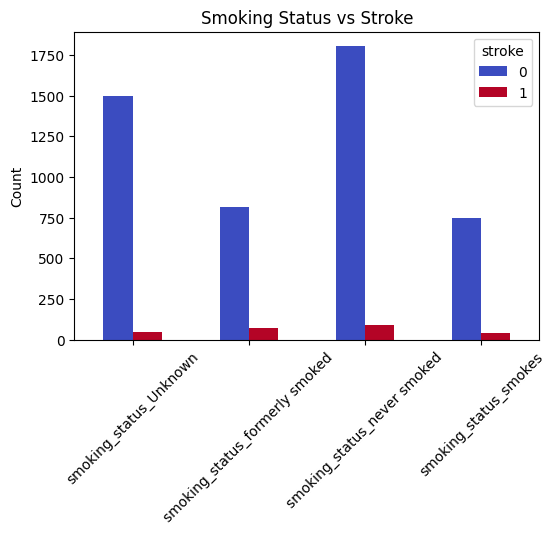

In [264]:
smoke_cols = [c for c in df.columns if c.startswith("smoking_status_")]

df[smoke_cols + ['stroke']].groupby('stroke').sum().T.plot(
    kind='bar', figsize=(6,4), colormap="coolwarm"
)

plt.title("Smoking Status vs Stroke")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

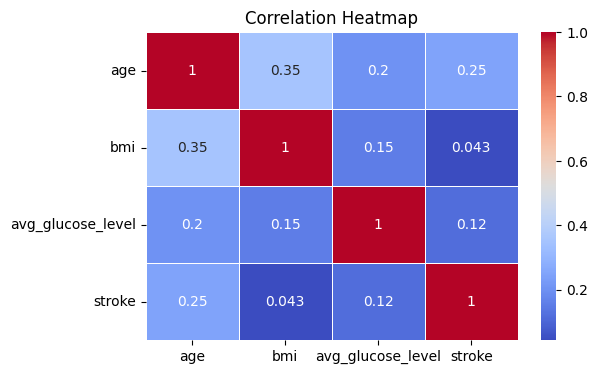

In [265]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['age','bmi','avg_glucose_level','stroke']].corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

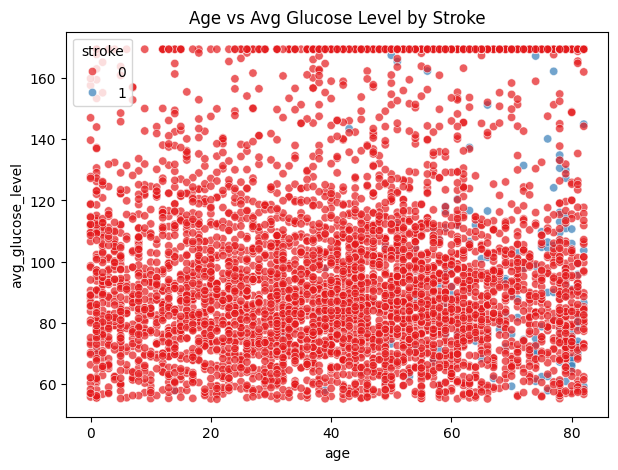

In [266]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', palette="Set1", alpha=0.7)
plt.title("Age vs Avg Glucose Level by Stroke")
plt.show()

/tmp/ipython-input-1809486595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='bmi', palette="pastel")


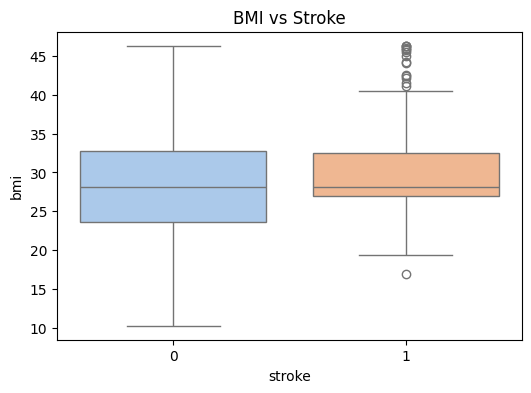

In [267]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='stroke', y='bmi', palette="pastel")
plt.title("BMI vs Stroke")
plt.show()

# Feature Engineering

In [268]:
# Age Binning
# df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 100], labels=['young', 'middle-aged', 'senior'])

In [269]:
# BMI Categories
# df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['underweight', 'normal', 'overweight', 'obese'])

In [270]:
# Interaction feature
# df['ht_hd'] = df['hypertension'] * df['heart_disease']

# Feature Selection

In [271]:
# One-hot encode the new categorical features
# df_encoded = pd.get_dummies(df[['age_group', 'bmi_category']], drop_first=True)

# Concatenate with main dataframe
# df_temp = pd.concat([df, df_encoded], axis=1)

# Correlation analysis again
# corr = df_temp.corr(numeric_only=True)['stroke'].sort_values(ascending=False)
# print(corr)

In [272]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


In [273]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
avg_glucose_level,0
bmi,0
stroke,0
work_type_Govt_job,0
work_type_Never_worked,0


In [274]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,Yes,169.3575,36.6,1,False,False,True,False,False,False,True,False,True,False,False
1,0,61,0,0,Yes,169.3575,28.1,1,False,False,False,True,False,True,False,False,False,True,False
2,1,80,0,1,Yes,105.9200,32.5,1,False,False,True,False,False,True,False,False,False,True,False
3,0,49,0,0,Yes,169.3575,34.4,1,False,False,True,False,False,False,True,False,False,False,True
4,0,79,1,0,Yes,169.3575,24.0,1,False,False,False,True,False,True,False,False,False,True,False


In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})

bool_cols = ['ever_married', 'heart_disease',
             'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
             'work_type_Never_worked', 'work_type_children',
             'Residence_type_Rural', 'Residence_type_Urban',
             'smoking_status_Unknown', 'smoking_status_formerly smoked',
             'smoking_status_never smoked', 'smoking_status_smokes']

for col in bool_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].map({'No': 0, 'Yes': 1, True: 1, False: 0})
    else:
        df[col] = df[col].astype(int)

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9510763209393346
ROC-AUC: 0.8400205761316872
Confusion Matrix:
 [[972   0]
 [ 50   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest CV ROC-AUC scores: [0.78983539 0.78115226 0.79208848 0.78085391 0.77302217]
Mean ROC-AUC: 0.7833904425967917
Best RF params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
===== Logistic Regression =====
Accuracy: 0.9510763209393346
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.8400205761316872
Confusion Matrix:
 [[972   0]
 [ 50   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


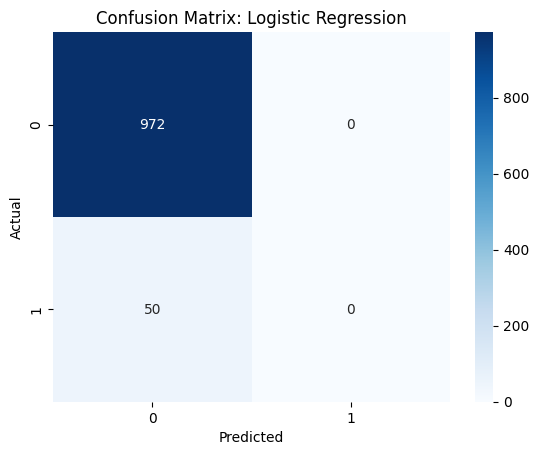

===== Decision Tree =====
Accuracy: 0.898238747553816
Precision: 0.09090909090909091
Recall: 0.12
F1-score: 0.10344827586206896
ROC-AUC: 0.5291358024691357
Confusion Matrix:
 [[912  60]
 [ 44   6]]


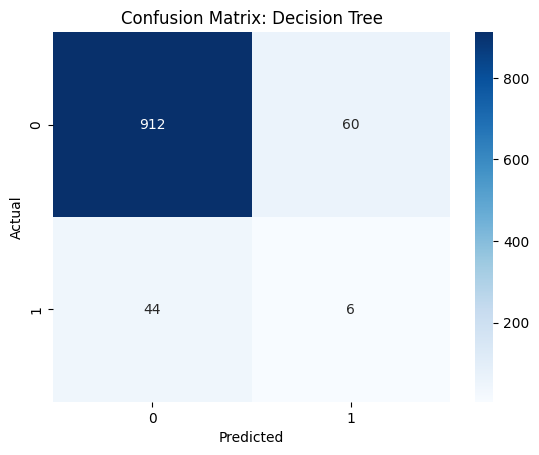

===== Random Forest =====
Accuracy: 0.949119373776908
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.7934670781893004
Confusion Matrix:
 [[970   2]
 [ 50   0]]


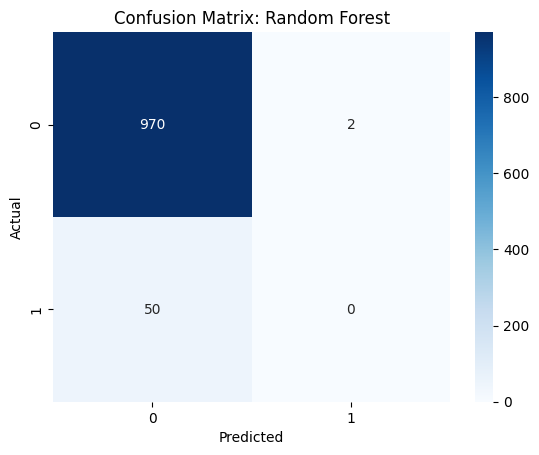

                 Model  Accuracy  F1-score   ROC-AUC
0  Logistic Regression  0.951076  0.000000  0.840021
1        Decision Tree  0.898239  0.103448  0.529136
2        Random Forest  0.949119  0.000000  0.793467


In [276]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
print("Random Forest CV ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid, scoring='f1', cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF params:", grid_rf.best_params_)

def evaluate_model(y_true, y_pred, y_prob, model_name="Model"):
    print(f"===== {model_name} =====")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_prob))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model(y_test, y_pred, y_prob, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, y_prob_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    "F1-score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

print(results)

Before SMOTE: {0: 3888, 1: 199}
After SMOTE: {0: 3888, 1: 3888}
===== Logistic Regression (SMOTE) =====
Accuracy: 0.9442270058708415
Precision: 0.3870967741935484
Recall: 0.24
F1-score: 0.2962962962962963
ROC-AUC: 0.8203703703703704
Confusion Matrix:
 [[953  19]
 [ 38  12]]


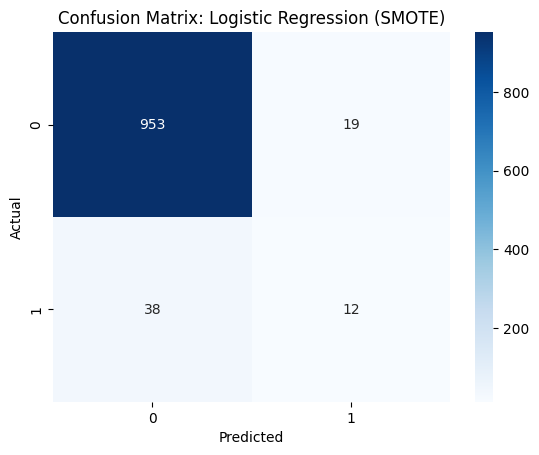

===== Decision Tree (SMOTE) =====
Accuracy: 0.8943248532289628
Precision: 0.10810810810810811
Recall: 0.16
F1-score: 0.12903225806451613
ROC-AUC: 0.5460493827160493
Confusion Matrix:
 [[906  66]
 [ 42   8]]


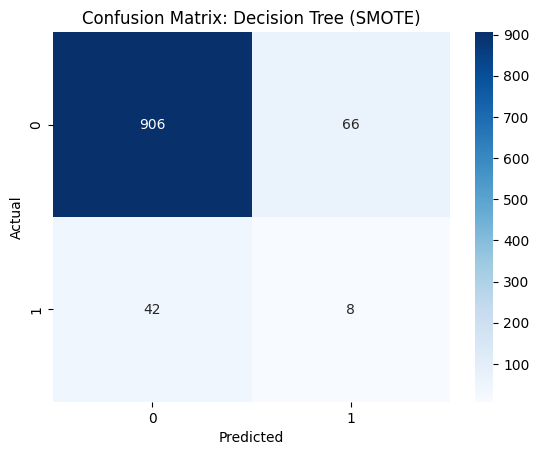

===== Random Forest (SMOTE) =====
Accuracy: 0.9471624266144814
Precision: 0.25
Recall: 0.04
F1-score: 0.06896551724137931
ROC-AUC: 0.7371604938271605
Confusion Matrix:
 [[966   6]
 [ 48   2]]


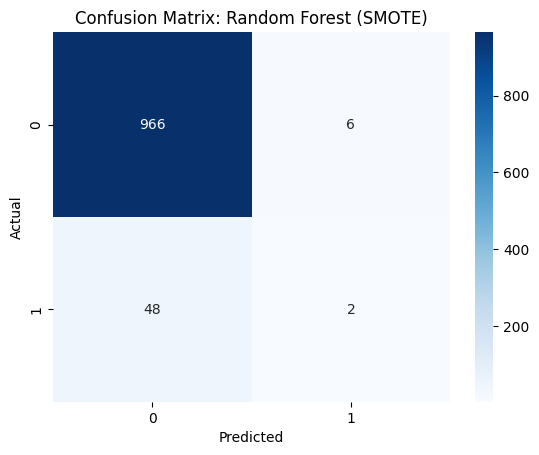

In [278]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_sm.value_counts().to_dict())

# Logistic Regression with SMOTE
lr_sm = LogisticRegression(max_iter=1000, random_state=42)
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_lr_sm = lr_sm.predict(X_test)
y_prob_lr_sm = lr_sm.predict_proba(X_test)[:, 1]

# Decision Tree with SMOTE
dt_sm = DecisionTreeClassifier(random_state=42)
dt_sm.fit(X_train_sm, y_train_sm)
y_pred_dt_sm = dt_sm.predict(X_test)
y_prob_dt_sm = dt_sm.predict_proba(X_test)[:, 1]

# Random Forest with SMOTE
rf_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rf_sm.predict(X_test)
y_prob_rf_sm = rf_sm.predict_proba(X_test)[:, 1]

evaluate_model(y_test, y_pred_lr_sm, y_prob_lr_sm, "Logistic Regression (SMOTE)")
evaluate_model(y_test, y_pred_dt_sm, y_prob_dt_sm, "Decision Tree (SMOTE)")
evaluate_model(y_test, y_pred_rf_sm, y_prob_rf_sm, "Random Forest (SMOTE)")

In [279]:
joblib.dump(lr_sm, "model.pkl")

['model.pkl']

In [280]:
print(X_train.columns.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
